In [2]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')

root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random

from scipy.stats import expon
from scipy.stats import pareto

import source.package.util as util

,eid,authid,authseq,indexname,surname,givenname,doctype,partition
165,85015329432,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0
166,85015329432,56998595200,2,Bang T.,Bang,Tewook,ar,3.0
167,85015329432,7409873371,3,Kim C.-K.,Kim,Choong-Ki,ar,3.0
168,85015329432,56194519000,4,Hur J.,Hur,Jae,ar,3.0
169,85015329432,57193625556,5,Kim S.,Kim,Seyeob,ar,3.0


In [11]:
nunique = authors_valid.groupby("eid")["authid"].nunique()
coauthors_valid = authors_valid[authors_valid["eid"].isin(nunique[nunique>1].index)]

In [13]:
coauthors_valid.shape[0], authors_valid.shape[0]

(21642699, 22084638)

In [80]:
result_PM = pd.read_pickle(result_path + "PM_default_5k.pickle")
result_PM.head()

,authid,year,seq,eid,source_authid,previous_work
2,55323498300,7,2,85018262613,23093224900,6.454914e+10
1,16506417600,1,1,84871729448,57209623964,8.487197e+10
4,35323952200,2,1,84871968771,57209623964,7.795399e+10
5,35323952200,1,1,84871729448,57209623964,8.487197e+10
8,55258183300,3,2,84871729448,57209623964,7.795399e+10


In [82]:
result_PM["source_authid"].nunique(),result_PM["source_authid"].shape[0]

(3140, 75422)

In [73]:
nunique[nunique>50].shape[0]

78898

In [74]:
# authors_valid = pd.read_pickle(result_path+"authors_valid_PM.pickle")
# year_df = pd.read_pickle(data_path+"paper_detail/year.pickle")

# threshold = 50
# nunique = authors_valid.groupby("authid")["eid"].nunique()
# authors_valid = authors_valid[authors_valid["authid"].isin(nunique[nunique>threshold].index)]
# authors_valid_year = pd.merge(authors_valid[["eid","authid"]], year_df, on="eid",how="left")
# print(authors_valid_year.head())

           eid       authid  year
0  85015329432  36620106200  2017
1  85015329432   7409873371  2017
2  85015329432  56194519000  2017
3  85015329432   7404777532  2017
4  85015329477   6601956424  2017


In [119]:
authors_valid = pd.read_pickle(result_path+"authors_valid_PM.pickle")
year_df = pd.read_pickle(data_path+"paper_detail/year.pickle")

authors = set(list(result_PM["source_authid"].values) +list(result_PM["authid"].values))
authors_valid = authors_valid[authors_valid["authid"].isin(authors)]
authors_valid_year = pd.merge(authors_valid[["eid","authid"]], year_df, on="eid",how="left")
print(authors_valid_year.head())

           eid       authid  year
0  85015329536   7006146119  2016
1  85015329536   6603147784  2016
2  85015329536   9740880600  2016
3  85015329536  37074461700  2016
4  85015329560  55710198500  2016


In [120]:
pd.read_pickle(result_path+"authors_valid_PM.pickle")["authid"].nunique(), authors_valid_year["authid"].nunique()

(3216696, 22445)

In [121]:
pd.read_pickle(result_path+"authors_valid_PM.pickle").shape[0], authors_valid_year.shape[0]

(22084638, 1466730)

In [122]:
mapping = {v:i for i,v in enumerate(authors_valid_year['authid'].unique())}
print(len(mapping))

22445


In [123]:
authors_valid_year_suc = authors_valid_year.assign(authid_suc = authors_valid_year["authid"].replace(mapping))
authors_valid_year_suc.head()

,eid,authid,year,authid_suc
0,85015329536,7006146119,2016,0
1,85015329536,6603147784,2016,1
2,85015329536,9740880600,2016,2
3,85015329536,37074461700,2016,3
4,85015329560,55710198500,2016,4


In [216]:
authors_valid_year_suc["authid"].nunique(),authors_valid_year["authid"].nunique()

(22445, 22445)

In [161]:
from itertools import combinations
from scipy.sparse import csr_matrix, save_npz, load_npz

edges = []
year_range = range(1970, 2021)
for i in year_range:
    # matrix = np.zeros((authors_valid_year["authid"].nunique(),authors_valid_year["authid"].nunique()),dtype='int')
    year_sample = authors_valid_year_suc[authors_valid_year_suc['year']==i]
    for j in year_sample["eid"].unique():
        arr = year_sample[year_sample["eid"]==j]["authid_suc"].unique()
        if len(arr)<2: continue
        combs = list(combinations(arr, 2))
        for comb in combs:
            # matrix[comb[0],comb[1]] += 1
            # matrix[comb[1],comb[0]] += 1
            edges.append((comb[0],comb[1]))
    # sparse_matrix = csr_matrix(matrix)
    # save_npz(result_path+ f'coauth_count_{i}.npz', sparse_matrix)

AttributeError: 'Graph' object has no attribute 'add_edges_frome'

In [166]:
G = nx.Graph()
G.add_edges_from(edges)

22327

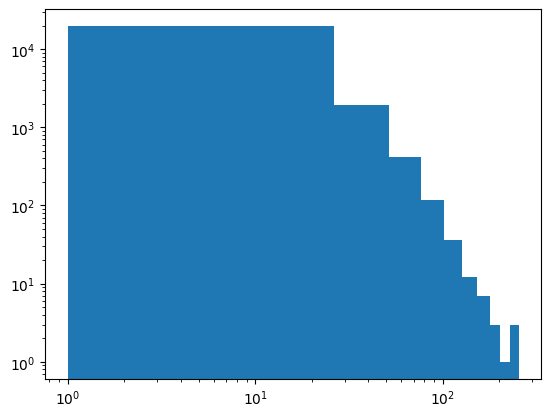

In [171]:
plt.hist([v[1] for v in G.degree])
plt.xscale("log")
plt.yscale("log")
len(G.nodes())

In [144]:
matrix = load_npz(result_path+ 'coauth_count_1970.npz')
for i in year_range[1:]:
    matrix += load_npz(result_path+ f'coauth_count_{i}.npz')
matrix = matrix.toarray()

In [152]:
m = np.where(matrix>0, 1, 0)

order = np.argsort(matrix.sum(axis=0))
clustered_matrix = matrix[order[::-1], :][:, order[::-1]]

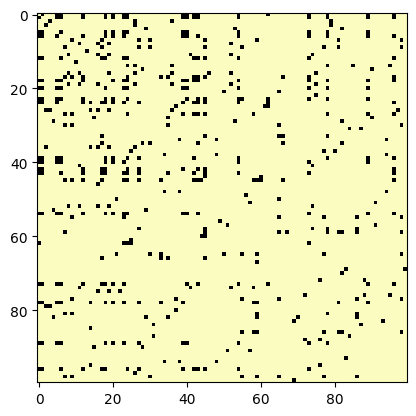

In [158]:
# plt.imshow(clustered_matrix, vmax=1,cmap="magma_r",)
plt.imshow(clustered_matrix[:100,:100], vmax=1,cmap="magma_r")

In [185]:
def quantize(m,size):
    quantized_matrix = np.zeros((m.shape[0]//size,m.shape[0]//size))
    for i in range(m.shape[0]//size):
        for j in range(m.shape[0]//size):
            quantized_matrix[i, j] = np.mean(m[i:(i+size), j:(j+size)])
    return quantized_matrix

In [218]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from community import community_louvain

adj_matrix = nx.adjacency_matrix(G).todense()

# 2. クラスタリングの実行
partition = community_louvain.best_partition(G)

# 3. ノードの再マッピング
sorted_nodes = sorted(partition.keys(), key=lambda x: partition[x])
node_map = {node: idx for idx, node in enumerate(sorted_nodes)}
reindexed_nodes = [node_map[node] for node in G.nodes()]

# 新しい順序に基づいて隣接行列を再構築
sorted_adj_matrix = adj_matrix[np.ix_(reindexed_nodes, reindexed_nodes)]

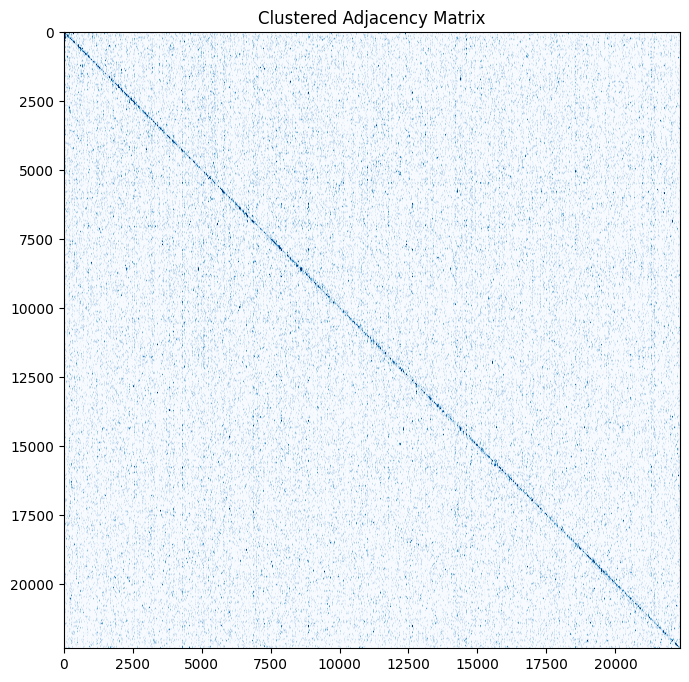

In [221]:
# 4. 隣接行列の可視化
plt.figure(figsize=(8, 8))
plt.imshow(sorted_adj_matrix, cmap='Blues',vmax=0.01,interpolation='bicubic')
plt.title('Clustered Adjacency Matrix')
plt.show()

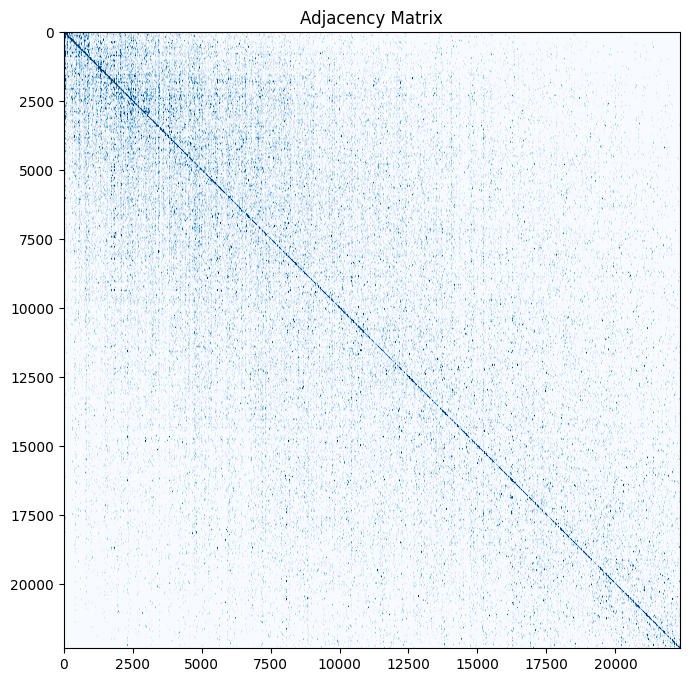

In [222]:
# 4. 隣接行列の可視化
plt.figure(figsize=(8, 8))
plt.imshow(adj_matrix, cmap='Blues',vmax=0.01,interpolation='bicubic')
plt.title('Adjacency Matrix')
plt.show()

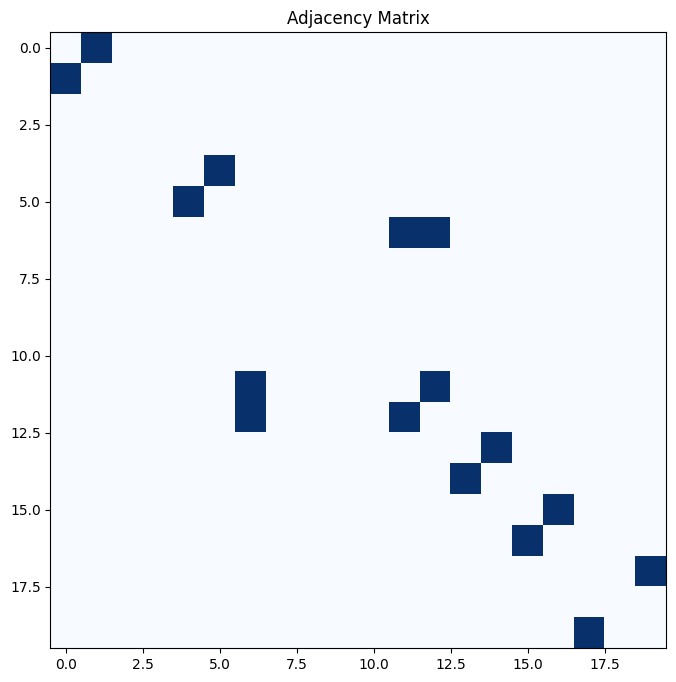

In [230]:
# 4. 隣接行列の可視化
plt.figure(figsize=(8, 8))
plt.imshow(sorted_adj_matrix[:20,:20], cmap='Blues',vmax=0.01,interpolation=None)
plt.title('Adjacency Matrix')
plt.show()

0.0284 0.0027 0.009020961611936697


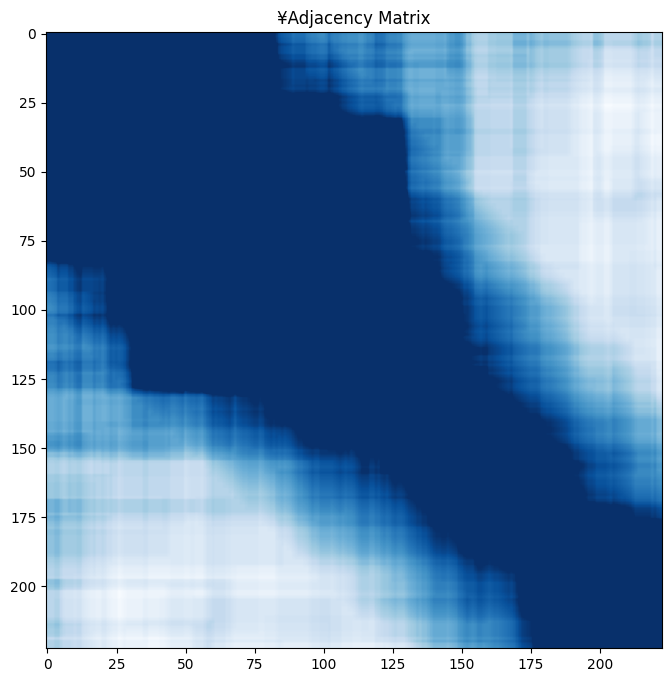

In [227]:
# 4. 隣接行列の可視化
qu = quantize(adj_matrix,100)
print(qu.max(), qu.min(), qu.mean())
plt.figure(figsize=(8, 8))
plt.imshow(qu, cmap='Blues',vmax=qu.mean()+2*qu.var(),vmin=qu.min())
plt.title('¥Adjacency Matrix')
plt.show()


0.0102 0.0011 0.0047242976934987625


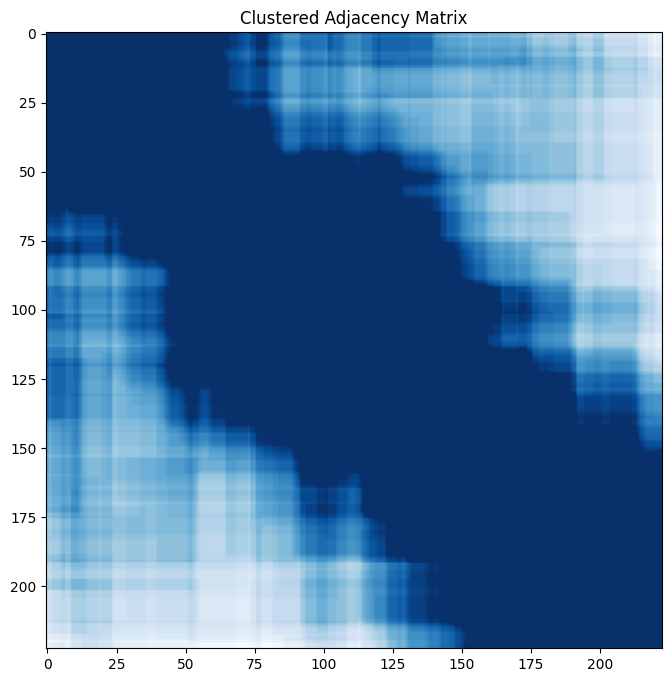

In [225]:
# 4. 隣接行列の可視化
qu = quantize(sorted_adj_matrix,100)
print(qu.max(), qu.min(), qu.mean())
plt.figure(figsize=(8, 8))
plt.imshow(qu, cmap='Blues',vmax=qu.mean()+2*qu.var(),vmin=qu.min())
plt.title('Clustered Adjacency Matrix')
plt.show()


In [203]:
sorted_adj_matrix.max(), qu.sum()

(1, 132.108)

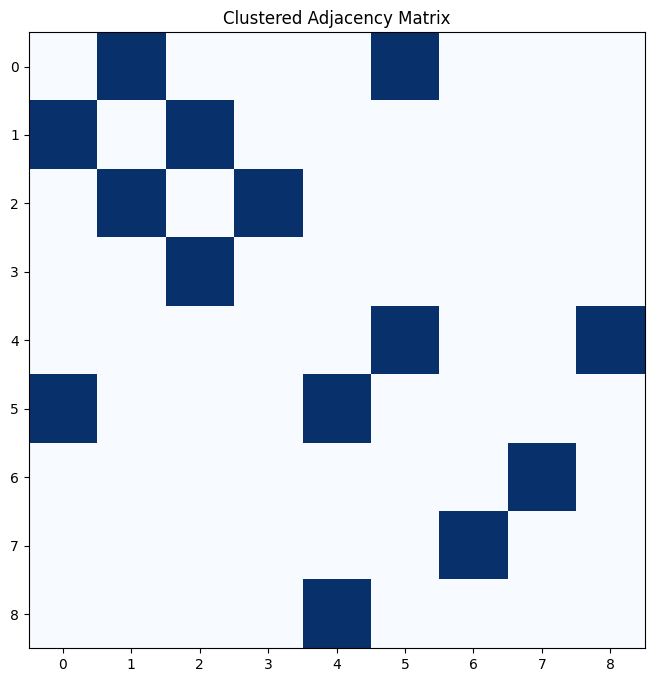

In [176]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from community import community_louvain

# 1. ネットワークデータの準備
edges = [(1, 2), (2, 3), (3, 4), (5, 6), (7, 8), (8, 9), (1, 9)]  # 例としてエッジリストを指定
G_samp = nx.Graph()
G_samp.add_edges_from(edges)
adj_matrix = nx.adjacency_matrix(G_samp).todense()

# 2. クラスタリングの実行
partition = community_louvain.best_partition(G_samp)

# 3. ノードの再マッピング
sorted_nodes = sorted(partition.keys(), key=lambda x: partition[x])
node_map = {node: idx for idx, node in enumerate(sorted_nodes)}
reindexed_nodes = [node_map[node] for node in G_samp.nodes()]

# 新しい順序に基づいて隣接行列を再構築
sorted_adj_matrix = adj_matrix[np.ix_(reindexed_nodes, reindexed_nodes)]

# 4. 隣接行列の可視化
plt.figure(figsize=(8, 8))
plt.imshow(sorted_adj_matrix, cmap='Blues')
plt.title('Clustered Adjacency Matrix')
plt.show()


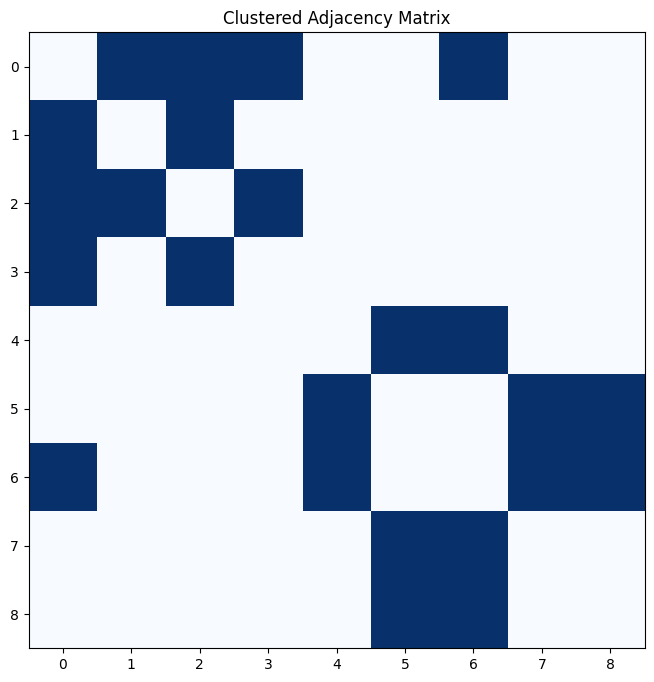

In [164]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from community import community_louvain

# 1. ネットワークデータの準備
# 例としてランダムグラフを生成
G_sample = nx.Graph()
G_sample.add_edges_from([(0,1),(0,2),(1,3),(1,4),(2,3),(2,4),(2,5),(5,6),(5,7),(5,8),(6,7),(8,7)])
# G = nx.erdos_renyi_graph(30, 0.05, seed=42)
adj_matrix = nx.adjacency_matrix(G_sample).todense()

# 2. クラスタリングの実行
partition = community_louvain.best_partition(G_sample)

# 3. クラスタ別にノードを並べ替える
# クラスタごとにノードをグループ化
sorted_nodes = sorted(partition.keys(), key=lambda x: partition[x])
sorted_adj_matrix = adj_matrix[np.ix_(sorted_nodes, sorted_nodes)]

# 4. 隣接行列の可視化
plt.figure(figsize=(8, 8))
plt.imshow(sorted_adj_matrix, cmap='Blues')
plt.title('Clustered Adjacency Matrix')
plt.show()


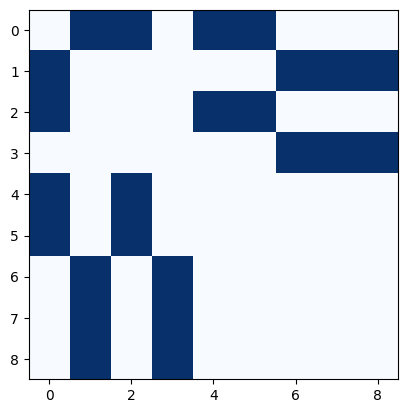

In [165]:
order = np.argsort(adj_matrix.sum(axis=0))
sorted_adj_matrix = adj_matrix[order[::-1], :][:, order[::-1]]
plt.imshow(sorted_adj_matrix, cmap='Blues')

In [103]:
authors_valid = pd.read_pickle(result_path+"authors_valid_PM.pickle")
authors_valid
authors_valid[authors_valid["authid"].isin(list(authors))]

,eid,authid,authseq,indexname,surname,givenname,doctype,partition
165,85015329432,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0
166,85015329432,56998595200,2,Bang T.,Bang,Tewook,ar,3.0
167,85015329432,7409873371,3,Kim C.-K.,Kim,Choong-Ki,ar,3.0
168,85015329432,56194519000,4,Hur J.,Hur,Jae,ar,3.0
169,85015329432,57193625556,5,Kim S.,Kim,Seyeob,ar,3.0
...,...,...,...,...,...,...,...,...
289838959,84927731812,56887670500,4,Calvani P.,Calvani,NO GIVENNAME,ar,3.0
289838960,84927731812,6507192277,5,Trucchi D.M.,Trucchi,NO GIVENNAME,ar,3.0
289838961,84927731812,9332709800,2,Pietropaolo A.,Pietropaolo,NO GIVENNAME,ar,3.0
289839046,84927667476,7004157249,1,De Dios-Leyva M.,De Dios-Leyva,NO GIVENNAME,ar,3.0
